#### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Load The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Adithya\Downloads\heart_attack_dataset.csv")
df=pd.DataFrame(data)
print(df.to_string())

     Age  Gender  Cholesterol_Level  Blood_Pressure Diabetes Smoking_History  Obesity Family_History Physical_Activity_Level  Stress_Levels  Heart_Attack
0     35  Female                330             135      Yes             Yes     27.5            Yes               Sedentary           10.0             1
1     48    Male                305             148      Yes             Yes     15.0            Yes                Moderate           10.0             1
2     49    Male                331             101       No              No     24.1            Yes                Moderate            3.4             1
3     30    Male                191             102       No              No     24.9            Yes               Sedentary            1.0             1
4     55  Female                292             115      Yes             Yes     27.6            Yes                  Active            7.3             0
5     33  Female                185             152       No              No

#### Checking Information

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Cholesterol_Level        1000 non-null   int64  
 3   Blood_Pressure           1000 non-null   int64  
 4   Diabetes                 1000 non-null   object 
 5   Smoking_History          1000 non-null   object 
 6   Obesity                  1000 non-null   float64
 7   Family_History           1000 non-null   object 
 8   Physical_Activity_Level  1000 non-null   object 
 9   Stress_Levels            1000 non-null   float64
 10  Heart_Attack             1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB
None


#### Checking Null Values

In [4]:
(df.isna())

,Age,Gender,Cholesterol_Level,Blood_Pressure,Diabetes,Smoking_History,Obesity,Family_History,Physical_Activity_Level,Stress_Levels,Heart_Attack
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


#### Cleaning Empty Cells

In [5]:
new_df=df.dropna(inplace=True)
print(new_df)

None


#### Correlation

In [6]:
print(df[['Smoking_History','Heart_Attack']])

    Smoking_History  Heart_Attack
0               Yes             1
1               Yes             1
2                No             1
3                No             1
4               Yes             0
..              ...           ...
995              No             1
996              No             1
997              No             1
998              No             1
999              No             0

[1000 rows x 2 columns]


In [7]:
print(df.head())


   Age  Gender  Cholesterol_Level  Blood_Pressure Diabetes Smoking_History  \
0   35  Female                330             135      Yes             Yes   
1   48    Male                305             148      Yes             Yes   
2   49    Male                331             101       No              No   
3   30    Male                191             102       No              No   
4   55  Female                292             115      Yes             Yes   

   Obesity Family_History Physical_Activity_Level  Stress_Levels  Heart_Attack  
0     27.5            Yes               Sedentary           10.0             1  
1     15.0            Yes                Moderate           10.0             1  
2     24.1            Yes                Moderate            3.4             1  
3     24.9            Yes               Sedentary            1.0             1  
4     27.6            Yes                  Active            7.3             0  


#### Encode categorical variables

In [8]:
categorical_columns = ["Gender", "Diabetes", "Smoking_History", "Family_History", "Physical_Activity_Level"]
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


#### Split features and target variable

In [9]:
X = df.drop("Heart_Attack", axis=1)
y = df["Heart_Attack"]


####  Normalize numerical features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Train a logistic regression model

In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

#### Make predictions

In [13]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[94 33]
 [38 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       127
           1       0.51      0.48      0.50        73

    accuracy                           0.65       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.64      0.65      0.64       200


Accuracy Score: 0.645


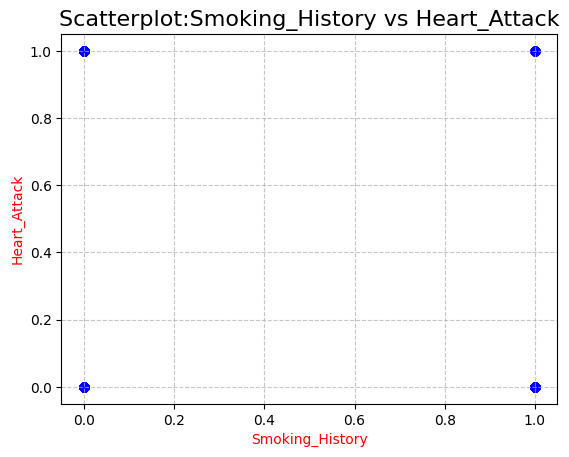

In [15]:
plt.Figure(figsize=(12,8))
plt.scatter(df['Smoking_History'],df['Heart_Attack'],alpha=0.6,color="blue") 
plt.title("Scatterplot:Smoking_History vs Heart_Attack",fontsize=16)
plt.xlabel('Smoking_History',fontsize=10,color="red")
plt.ylabel('Heart_Attack',fontsize=10,color="red")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
